In [1]:
from vectors import *
import vectors
import pygame
from draw2d import *

pygame 2.1.2 (SDL 2.0.18, Python 3.9.12)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
class PolygonModel():
    def __init__(self,points):
        self.points=points
        self.angle=0
        self.x=0
        self.y=0
        self.vx=0
        self.vy=0

In [3]:
class Asteroids(PolygonModel):
    def __init__(self):
        sides=randint(5,9)
        vs=[vectors.to_cartesian((uniform(0.5,1.0),2*pi*i/sides))for i in range(0,sides)]
        super().__init__(vs)
        self.vx=uniform(-1,1)
        self.vy=uniform(-1,1)

In [4]:
def do_segments_intersect(s1,s2):
    u1,u2=s1
    v1,v2=s2
    l1,l2=distance(*s1),distance(*s2)
    try:
        x,y=intersection(u1,u2,v1,v2)
        return (distance(u1,(x,y))<=l1 and
                   distance(u2,(x,y))<=l1 and
                   distance(v1,(x,y))<=l2 and
                   distance(v2,(x,y))<=l2)
    except np.linalg.linalg.LinAlgError:
        return False

class PolygonModel():
    def __init__(self,points):
        self.points=points
        self.rotation_angle=0
        self.x=0
        self.y=0
        
    def transformed(self):
        rotated = [vectors.rotate2d(self.rotation_angle, v) for v in self.points]
        return [vectors.add((self.x,self.y),v) for v in rotated]
    
    def segments(self):
        point_count=len(self.points)
        points=self.transformed()
        return [(points[i],points[(i+1)%point_count])
               for i in range(0,point_count)]
    
    def does_intersect(self,other_segment):
        for segment in self.segments():
            if do_segments_intersect(other_segment,segment):
                return True
        return False
    
    def does_collide(self,other_poly):
        for other_segment in other_poly.segments():
            if self.does_intersect(other_segment):
                return True
        return False

    def move(self,milliseconds):
        dx,dy=self.vx*milliseconds/1000.0,self.vy*milliseconds/1000.0
        self.x,self.y=vectors.add((self.x,self.y),(dx,dy))
        if self.x<-10:
            self.x+=20
        if self.y<-10:
            self.y+=10
        if self.x>10:
            self.x-=20
        if self.y>10:
            self.y-=20

In [5]:
t=0
s=(0,0)
v=(1,0)
a=(0,0.2)

In [6]:
dt=2
steps=5

In [7]:
positions=[s]
for _ in range(0,5):
    t+=2
    s=add(s,scale(dt,v))
    v=add(v,scale(dt,a))
    positions.append(s)
arrows=[]
for i in range(len(positions)-1):
    arrows.append(Arrow2D(positions[i+1],positions[i]))

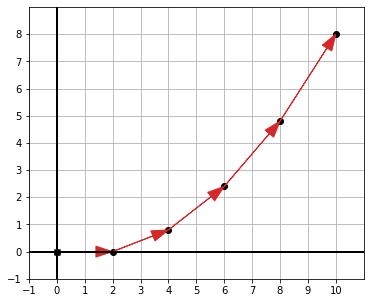

In [8]:
draw2d(Points2D(*positions),
     *arrows)

In [26]:
def Displacement_fitting(dt,steps,line='Arrow2D',points=True,color='blue'):
    t=0
    s=(0,0)
    v=(1,0)
    a=(0,0.2)
    positions=[s]
    for _ in range(0,steps):
        t+=dt
        s=add(s,scale(dt,v))
        v=add(v,scale(dt,a))
        positions.append(s)
    link=[]
    for i in range(len(positions)-1):
        if line=='Arrow2D':
            link.append(Arrow2D(positions[i+1],positions[i],color=color))
        if line=='Segment2D':
            link.append(Segment2D(positions[i+1],positions[i],color=color))
    for j in range(len(positions)):
        if points==False:
            break
        link.append(Points2D(positions[j]))
    return link

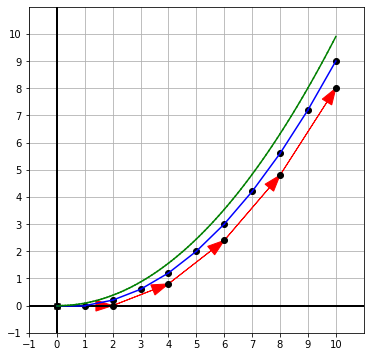

In [28]:
draw2d(
    *Displacement_fitting(2,5,color='red'),
    *Displacement_fitting(1,10,line='Segment2D'),
    *Displacement_fitting(0.1,100,line='Segment2D',points=False,color='green'),
)